<a href="https://colab.research.google.com/github/samp3209/datamining/blob/main/oneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(384, 997)
(384,)
1.0


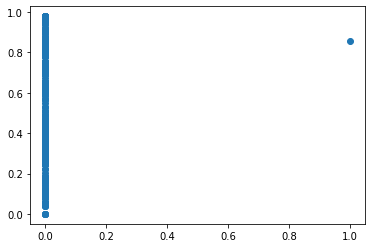

In [37]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
university_towns = []

with open('university_towns.txt') as file:
  for line in file:
    if '[edit]' in line:
      state = line
    else:
      university_towns.append((state,line))

university_towns[:5]

df = pd.DataFrame(university_towns, columns=['State', 'RegionName'])
#print(df.head())
df['State'] = df['State'].str.replace('\[edit\]\\n', ' ')

def get_city(item):
  #takes in df and goes line by line editing the data by finding where a given character is a choosing everything before that character
    if ')' in item:
      return item[:item.find(')')]
    elif '[' in item:
      return item[:item.find('[')]
    else:
      return item

df = df.applymap(get_city)
df.head()
#splits the regionname column into city and university and cleaning the columns up
df[['City', 'University', 'misc']] = df['RegionName'].str.split("\(", expand=True)
df.drop('misc', axis=1, inplace=True)
df.drop('RegionName', axis=1, inplace=True)
df = df.dropna()
label_df = df

label_encoder = LabelEncoder()
#print(df.dtypes)
data_coloumn_category = df.select_dtypes(exclude=[np.number]).columns
data_column_numeric = df.select_dtypes(include=[np.number]).columns

#print(data_coloumn_category)
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded = onehot_encoder.fit_transform(df[['City', 'University']])

#creating final dataset. Problem is that there are so many states and cities its difficult to use onehot
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names(['City','University']))
#df_onehot_getdummies = pd.get_dummies(df[data_coloumn_category], prefix=data_coloumn_category)
#final_df = pd.concat([df_onehot_getdummies, df[data_column_numeric]], axis=1)
#final_df.std().sort_values(ascending=False)
#onehot_encoded_frame.std().sort_values(ascending=False)
#print(onehot_encoded_frame.shape)



#scaler = MinMaxScaler()
#label encoding the dataset into new df called label_df

label_df['State'] = label_encoder.fit_transform(df['State'])

#label_df = sklearn.preprocessing.minmax_scale(label_df)
#scaling each of the columns using min max scaler
#label_df['University'] = sklearn.preprocessing.minmax_scale(label_df['University'])
label_df['State'] = sklearn.preprocessing.minmax_scale(label_df['State'])
#label_df['City'] = sklearn.preprocessing.minmax_scale(label_df['City'])
#print(label_df.shape)




#splitting data into testing/training data sets and reshaping data
X_train, X_test, Y_train, Y_test = train_test_split(onehot_encoded_frame,label_df['State'], test_size=.25)
xb = np.array(X_train)
print(xb.shape)
xb = xb.reshape(384,997)
print(yb.shape)
yb = np.array(Y_train)
yb = yb.reshape(384,)

xb_test = np.array(X_test)
xb_test = xb.reshape(384,997)
yb_test = np.array(Y_test)
yb_test = yb.reshape(384,)

#generating best model and getting its score
bestModel = lm.LinearRegression().fit(xb,yb)
BMscore = bestModel.score(xb_test, yb_test)
print(BMscore)
yb_pred = bestModel.predict(xb_test)
#plotting the model
plt.figure(0)
plt.scatter(xb_test[:,0], yb_test)
#plt.plot(xb_test, yb_pred, color='red')

#final thoughts: This data has a linear regression score of 1 which means that it can accurately predict the state a university is in given the school name and city its in